In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train = pd.read_csv(r"D:\ExceLR Solution\Assignments\Logistic Regression\Titanic_train.csv") 
test = pd.read_csv(r"D:\ExceLR Solution\Assignments\Logistic Regression\Titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape 

(891, 12)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### I am deleting the PassengerId,Name of Passenger,Ticket number columns

* PassengerId : passengerId columns have lots of unique values they are not give any sence of analysis 
* Name : name column also have passenger name 
* Ticket : ticket have ticket number of passenger 

In [7]:
train.drop(["PassengerId","Name",'Ticket'],axis=1,inplace=True)

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include='object')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

## Bar Graph for Categorical Feature 

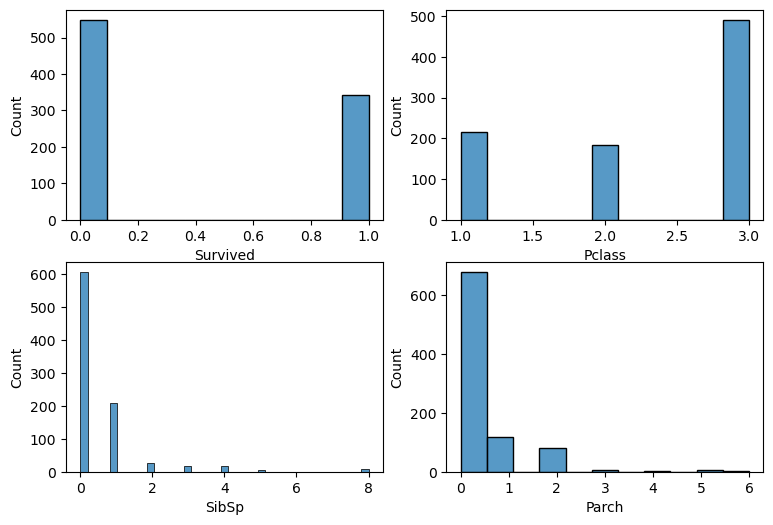

In [11]:
plt.figure(figsize=(9,6))
plt.subplot(2,2,1)
sns.histplot(train.Survived)
plt.subplot(2,2,2)
sns.histplot(train.Pclass)
plt.subplot(2,2,3) 
sns.histplot(train.SibSp)
plt.subplot(2,2,4) 
sns.histplot(train.Parch) 
plt.show()

## Histogram for Numerical feature

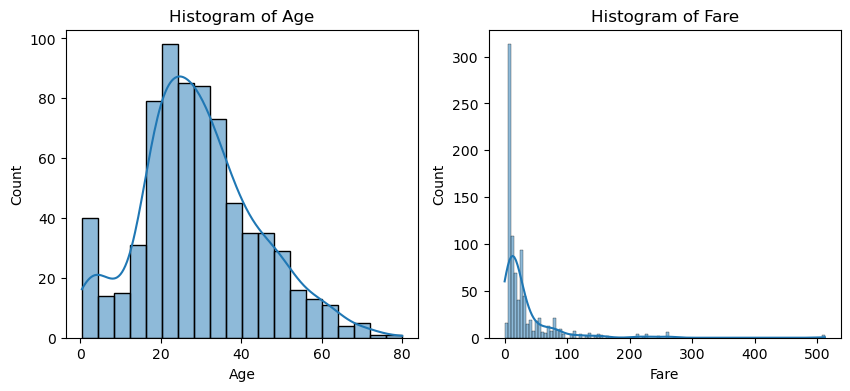

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(train.Age,kde=True)
plt.title("Histogram of Age")
plt.subplot(1,2,2)
sns.histplot(train.Fare,kde=True)
plt.title("Histogram of Fare")
plt.show()

## Missing value Detection

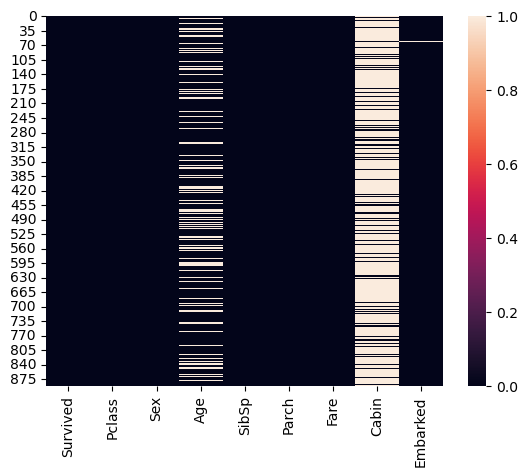

In [13]:
sns.heatmap(train.isnull())
plt.show()

In [14]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Handeling Missing Values

In [15]:
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer 

### Mean Imputation

In [16]:
mean_imputer = SimpleImputer(strategy='mean')

In [17]:
train['Age'] = mean_imputer.fit_transform(train[['Age']])
train['Fare'] = mean_imputer.fit_transform(train[['Fare']])

### Median Imputation 

In [18]:
median_imputer = SimpleImputer(strategy='median')

In [19]:
train['Age'] = mean_imputer.fit_transform(train[['Age']])
train['Fare'] = mean_imputer.fit_transform(train[['Fare']])

### Mode Imputation

In [20]:
mode_imputer = SimpleImputer(strategy='most_frequent')

In [21]:
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0]) 

## Box Plot for Outlier detection 

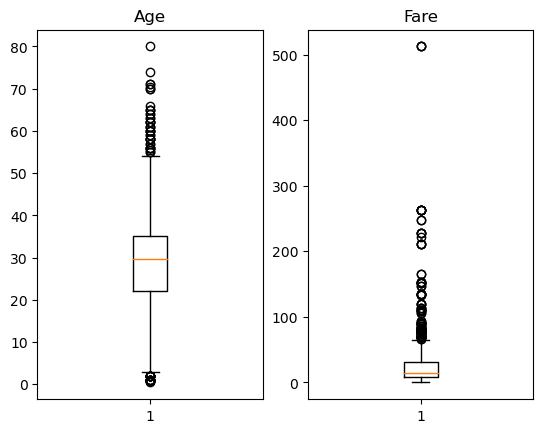

In [22]:
plt.subplot(1,2,1)
plt.boxplot(train.Age)
plt.title("Age")
plt.subplot(1,2,2)
plt.boxplot(train.Fare)
plt.title("Fare")
plt.show() 

### Handeling Outliers 

In [23]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])

    return df 

In [24]:
train = cap_outliers_iqr(train,'Age')
train = cap_outliers_iqr(train,'Fare')

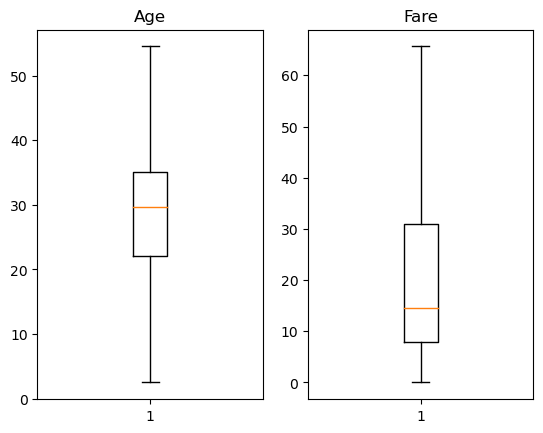

In [25]:
plt.subplot(1,2,1)
plt.boxplot(train.Age)
plt.title("Age")
plt.subplot(1,2,2)
plt.boxplot(train.Fare)
plt.title("Fare")
plt.show()  

In [26]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

I am obsever dataset is imbalanced dataset

### Handeling Imbalenced data set 

In [27]:
from sklearn.utils import resample  

In [28]:
minority_class = train[train['Survived']==1]
majority_class = train[train['Survived']==0]

In [29]:
oversample_minority_class = resample(minority_class,
                                    replace=True,
                                    n_samples=len(majority_class))

In [30]:
final_df = pd.concat([majority_class,oversample_minority_class],axis=0)

In [31]:
final_df['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [32]:
final_df.shape

(1098, 9)

In [42]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
5,0,3,male,29.699118,0,0,8.4583,B96 B98,Q
6,0,1,male,54.000000,0,0,51.8625,E46,S
7,0,3,male,2.500000,3,1,21.0750,B96 B98,S


# Data Preproccessing 

In [33]:
x = final_df.drop('Survived',axis=1)
y = final_df['Survived'] 

In [43]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,B96 B98,S
4,3,male,35.000000,0,0,8.0500,B96 B98,S
5,3,male,29.699118,0,0,8.4583,B96 B98,Q
6,1,male,54.000000,0,0,51.8625,E46,S
7,3,male,2.500000,3,1,21.0750,B96 B98,S


### Train test Split 

In [34]:
from sklearn.model_selection import train_test_split 

In [35]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.1,random_state=12)

In [44]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
169,3,male,28.0,0,0,56.4958,B96 B98,S
426,2,female,28.0,1,0,26.0000,B96 B98,S
311,1,female,18.0,2,2,65.6344,B57 B59 B63 B66,C
729,3,female,25.0,1,0,7.9250,B96 B98,S
750,2,female,4.0,1,1,23.0000,B96 B98,S


### Pipeline for Featuer Engineering 

In [36]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression 

In [37]:
num_cols = ['Age','Fare']
cat_cols = ['Sex','Cabin','Embarked'] 

In [38]:
num_pip = Pipeline([('Mean_imp',SimpleImputer(strategy='mean')),('scler',StandardScaler())]) 
cat_pip = Pipeline([('mode_imp',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())])

In [39]:
preprocessor = ColumnTransformer([('num_pip',num_pip,num_cols),('cat_pip',cat_pip,cat_cols)])

In [45]:
x_train_pro = preprocessor.fit_transform(x_train)

In [47]:
x_valid_pro = preprocessor.transform(x_train)

# Model Building:

In [48]:
from sklearn.linear_model import LogisticRegression 

In [49]:
model = LogisticRegression()

In [52]:
model.fit(x_train_pro,y_train) 

LogisticRegression()

In [53]:
y_train_pred = model.predict(x_train_pro) 
y_valid_pred = model.predict(x_valid_pro) 

### Model Evalute 

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score 

In [56]:
print("Train Accuracy :",accuracy_score(y_train,y_train_pred)) 

Train Accuracy : 0.8188259109311741


### Hyperparameter Tuning 

In [60]:
from sklearn.model_selection import RandomizedSearchCV 

In [61]:
parameters = {'penalty':['l1','l2','elasticnet'],'C':[0.1,1.0,2,0.3],'solver':['lbfgs','liblinear','newton-cg']}

In [62]:
model_cv = RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=10,return_train_score=True)

In [64]:
model_cv.fit(x_train_pro,y_train)

C:\Users\91932\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91932\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91932\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91932\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1.0, 2, 0.3],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg']},
                   return_train_score=True)

In [65]:
y_valid_pred = model_cv.predict(x_valid_pro)
y_train_pred = model_cv.predict(x_train_pro)

In [68]:
print("Train Accuracy :",accuracy_score(y_train,y_train_pred))  

Train Accuracy : 0.8188259109311741


In [ ]:
model_cv.best_estimator_

In [69]:
model_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}

In [70]:
final_model = LogisticRegression(solver='newton-cg',penalty='l2', C=0.1)

In [71]:
final_model.fit(x_train_pro,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [72]:
import pickle 

In [76]:
pickle.dump(final_model,open('classifier.pkl','wb'))

In [77]:
pickle.dump(preprocessor,open('preproccessor.pkl','wb'))

# Interview Questions:

 1) What is the difference between precision and recall?

 --> Precision and recall are two important metrics used to evaluate the performance of a machine learning model, especially in classification tasks. Here’s a breakdown of each:
Precision

Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Formula: Precision=True Positives+False PositivesTrue Positives​

Interpretation: Precision answers the question, “Of all the instances that were predicted as positive, how many were actually positive?” It measures the accuracy of the positive predictions.

Recall

Definition: Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to all the observations in the actual class.
Formula: Recall=True Positives+False NegativesTrue Positives​

Interpretation: Recall answers the question, “Of all the actual positive instances, how many were correctly predicted?” It measures the model’s ability to capture all the relevant cases.

2. What is cross-validation, and why is it important in binary classification?

--> Cross-validation is a technique used to evaluate the performance of a machine learning model by partitioning the original dataset into multiple subsets. The model is trained on some of these subsets and tested on the remaining ones. This process is repeated multiple times to ensure that the model’s performance is consistent and not dependent on a particular subset of the data. 

Why is Cross-Validation Important in Binary Classification?

--> Reduces Overfitting: By training and testing the model on different subsets of the data, cross-validation helps to ensure that the model generalizes well to unseen data, reducing the risk of overfitting.

Provides a More Reliable Estimate of Model Performance: Instead of relying on a single train-test split, cross-validation provides a more comprehensive evaluation by averaging the performance across multiple splits.

Helps in Model Selection: Cross-validation can be used to compare different models or hyperparameters, helping to select the best-performing model.